In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

In [2]:
xs = [1, 2, 3, 4, 5, 6]
ys = [5, 4, 6, 5, 6, 7]

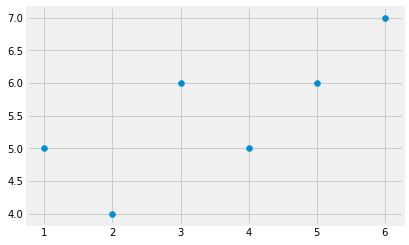

In [3]:
plt.scatter(xs, ys)
plt.show()

In [4]:
# change list to numpy array

xs = np.array(xs)
ys = np.array(ys)

In [5]:
def best_fit_slope(xs, ys):
    m =  ( ( (mean(xs)*mean(ys)) - mean(xs*ys) ) / ( (mean(xs))**2 - mean(xs**2) )  )
    return m
    
    
m = best_fit_slope(xs, ys)

In [6]:
print(m)     # slope

0.8333333333333334


In [7]:
def y_intercept(m,xs,ys):
    b = mean(ys) - m*mean(xs)
    return b

b = y_intercept(m,xs,ys)
print(b)

2.5


In [8]:
regression_line = [(m*x)+b for x in xs]

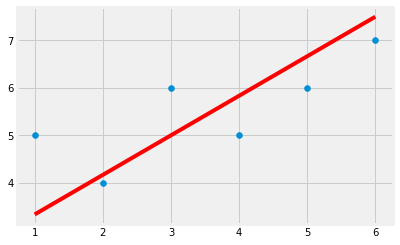

In [9]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line, 'red')
plt.show()

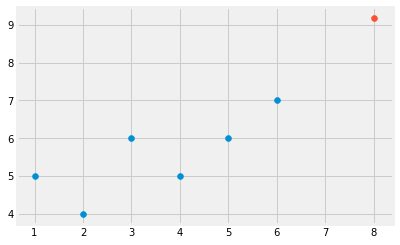

In [10]:
predict_x = 8
predict_y = (m*predict_x)+b
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y)
plt.show()

#### R squared Error

In [11]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

In [12]:
def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

In [13]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.2579365079365079


#### Testing Assumptions

In [14]:
import random

In [15]:
def create_dataset(hm, variance, step = 2, correlation = False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation  == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)

In [20]:
xs, ys = create_dataset(40, 40, 2, correlation = 'pos')

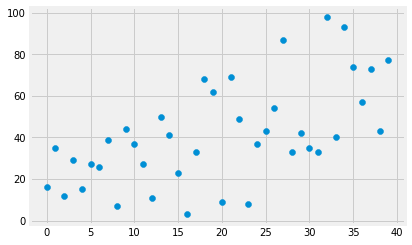

In [22]:
plt.scatter(xs, ys)
#plt.plot(xs, regression_line)

plt.show()